In [1]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import functools
import community

from scipy import sparse
from scipy.sparse import linalg
import time
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping

from math import sqrt
import pandas as pd
from shapely.ops import cascaded_union
pd.set_option('precision', 10)
import pysal as ps

In [3]:
import math
import geoplot as gplt

In [2]:
import utilities as uf

In [4]:
from importlib import reload

In [67]:
reload(uf)

<module 'utilities' from 'C:\\Users\\g_filo01\\sciebo\\scripts\\Image of the City\\utilities.py'>

In [5]:
#initialise path, names, etc.

city_name = 'London'
folder_ouptut ='Outputs/'+city_name+'/'
epsg = 27700
crs = {'init': 'epsg:27700', 'no_defs': True}

In [6]:
# try reading nodes, paths, landmarks and sight_lines
# At this point, every element has already been extracted

nodes = gpd.read_file(folder_ouptut+city_name+'_nodes.shp', driver='ESRI Shapefile')
paths = gpd.read_file(folder_ouptut+city_name+'_paths.shp', driver='ESRI Shapefile')

In [52]:
counts = pd.read_csv("C:/Users/g_filo01/sciebo/GIS Data/Simulation/London_pedestrian_counts_650.csv")
counts_2nd = pd.read_csv("C:/Users/g_filo01/sciebo/GIS Data/Simulation/London_pedestrian_counts_650_2run.csv")

In [56]:
col = ['euclidean', 'topological', 'angular', 'euclideanLand' ,'landmark', 'angularLand', 'landmark_L', 'landmark_G']
df = [counts_2nd]
for n, d in enumerate(df):
    for i in col: d.rename(columns={i: i+str(n)}, inplace=True)

In [59]:
paths_data = pd.merge(paths, counts, left_on= "streetID", right_on= "streetID", how= 'left')
paths_data = pd.merge(paths_data, counts_2nd, left_on= "streetID", right_on= "streetID", how= 'left')

In [29]:
traj = gpd.read_file('Outputs/tmp/'+city_name+'/'+city_name+'_counts_od.shp', driver='ESRI Shapefile')

In [68]:
col = ['euclidean', 'topological', 'angular', 'euclideanLand' ,'landmark', 'angularLand', 'landmark_L', 'landmark_G']
col_0 = ['euclidean0', 'topological0', 'angular0', 'euclideanLand0' ,'landmark0', 'angularLand0', 'landmark_L0', 'landmark_G0']

for n,i in enumerate(col):
    tmp = paths_data.copy()
#     uf.scaling_columnDF(tmp, i)
    uf.plot_lines_aside(tmp, classes = 7, lw = 1.5, column = i, column_a = col_0[n], title = i, 
               scheme = 'fisher_jenks', cmap = 'Greys_r', fcolor = 'white', legend = False, black_back = True)

RuntimeError: adjustable='datalim' is not allowed when both axes are shared.

RuntimeError: adjustable='datalim' is not allowed when both axes are shared.

<Figure size 1080x1080 with 2 Axes>

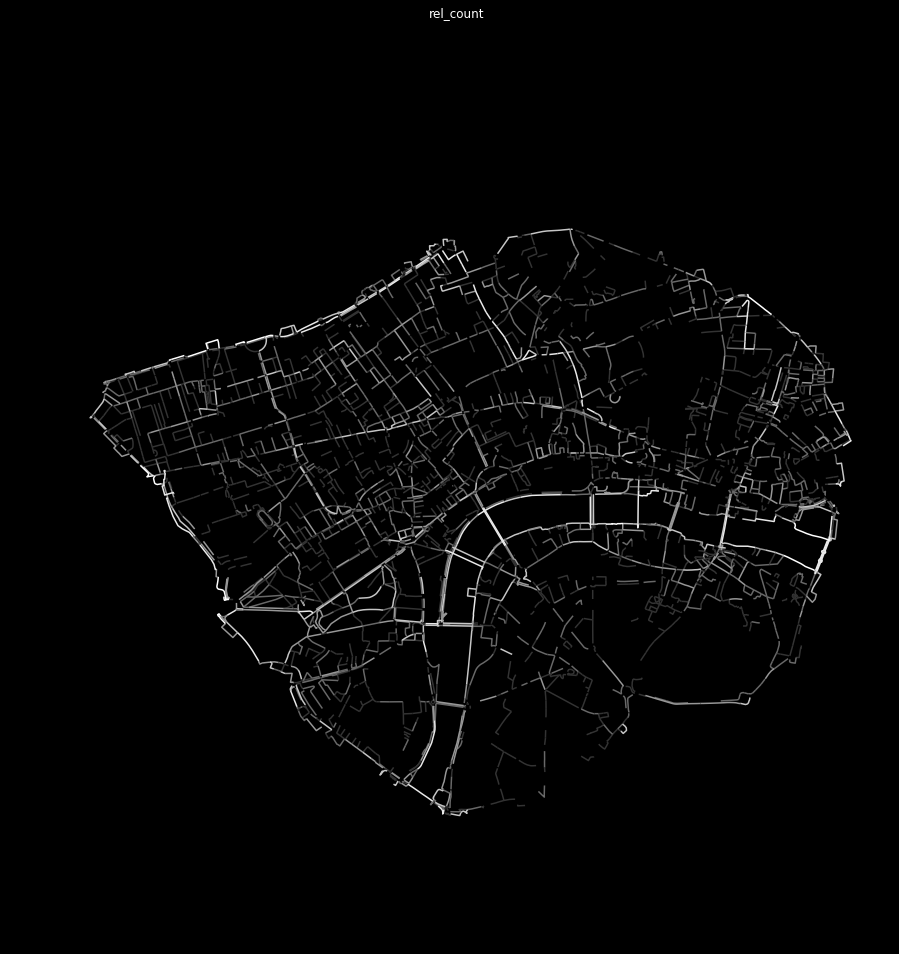

In [31]:
uf.scaling_columnDF(traj, 'rel_count')
uf.plot_lines(traj, classes = 7, lw = 1.5, column = 'rel_count', title = 'rel_count', 
               scheme = 'fisher_jenks', cmap = 'Greys_r', fcolor = 'white', legend = False, black_back = True, compare = None)

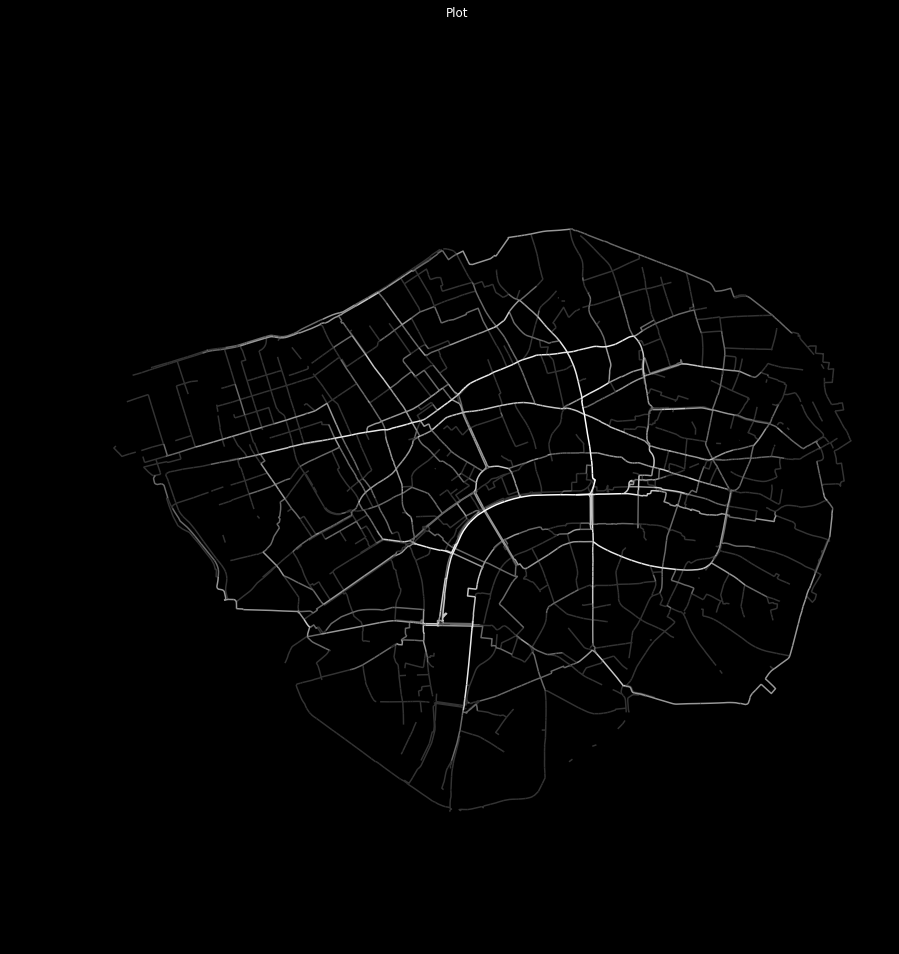

In [45]:
uf.plot_lines(paths_data, classes = 7, lw = 1.5, column = 'angularLand', title = 'Plot', 
               scheme = 'fisher_jenks', cmap = 'Greys_r', fcolor = 'white', legend = False, black_back = True, compare = None)

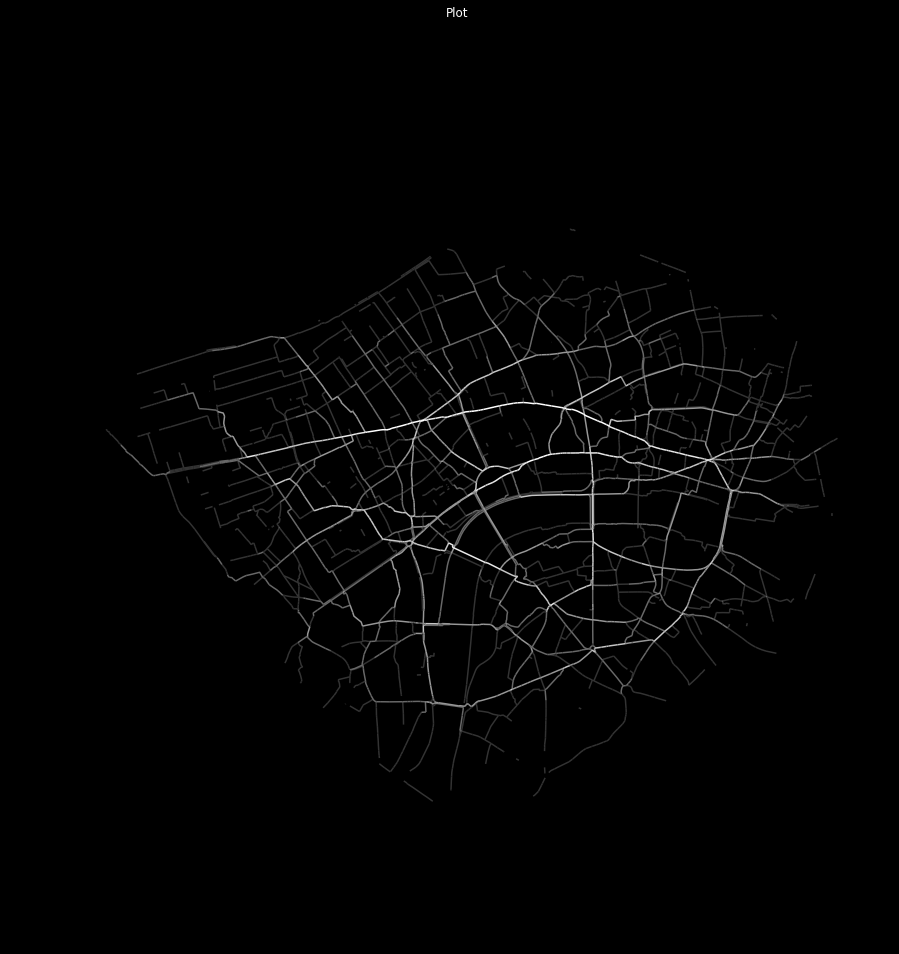

In [250]:
uf.plot_lines(paths_data, classes = 7, lw = 1.5, column = 'euclidean', title = 'Plot', 
               scheme = 'fisher_jenks', cmap = 'Greys_r', fcolor = 'white', legend = False, black_back = True, compare = None)

In [28]:
len(paths_data)

13531

In [ ]:

    
    
    if column != None: gdf.sort_values(by = column, ascending = True, inplace = True)
    f, ax = plt.subplots(1, figsize=(15, 15), facecolor = fcolor)
    if black_back == True: tcolor = 'white'
    else: tcolor = 'black'
    rect = f.patch    
    if black_back == True: rect.set_facecolor('black')
    else: rect.set_facecolor('white')
        
    f.suptitle(title, color = tcolor) 
    plt.axis('equal')
    ax.set_axis_off()
    
    if (column != None) & (scheme == None):
        gdf.plot(ax = ax, column = column, linewidth = lw, legend = legend) 
    
    elif scheme == "LynchBreaks":
        bins = [0.12, 0.25, 0.50, 0.75, 1.00]
        cl = ps.User_Defined(edges_gdf[column], bins)
        gdf.assign(cl = cl.yb).plot(ax = ax, column= 'cl', categorical = True, k = 5, cmap = cmap, linewidth = lw, legend=True)
    
        leg = ax.get_legend()
        leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
        leg.get_texts()[0].set_text('0.00 - 0.12')
        leg.get_texts()[1].set_text('0.12 - 0.25')
        leg.get_texts()[2].set_text('0.25 - 0.50')
        leg.get_texts()[3].set_text('0.50 - 0.75')
        leg.get_texts()[4].set_text('0.75 - 1.00')
    
    elif scheme != None:
        gdf.plot(ax = ax, column = column, k = classes, cmap = cmap, linewidth = lw, scheme = scheme, legend = legend)
        sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = gdf[column].min(), vmax = gdf[column].max()))
        if legend == True:
            leg = ax.get_legend()  
            leg.get_frame().set_linewidth(0.0)
        
#         sm._A = []
#         cb=plt.colorbar()
#         f.colorbar(sm)
        
    else:
        gdf.plot(ax = ax, linewidth = lw, color = 'black')
        if compare != None: compare.plot(ax = ax, linewidth = 1, color = 'red')  
    
     
    plt.show()

In [24]:
paths_data.to_file(folder_ouptut+city_name+'_pedestrians_count.shp', driver='ESRI Shapefile')

In [ ]:
paths_data.dtypes

In [ ]:
cmap = cm.get_cmap('Greys_r')
cmap(100)

In [ ]:
paths_data['euclideanDiff'] = paths_data['euclidean']-paths_data['euclideanLand']

In [41]:
paths_data.dtypes

streetID           int64
length           float64
highway           object
name              object
v                  int64
u                  int64
key                int64
Eb               float64
Erw              float64
Ab               float64
natural_id        object
length_sc        float64
geometry          object
euclidean          int64
topological        int64
angular            int64
euclideanLand      int64
landmark           int64
angularLand        int64
landmark_L         int64
landmark_G         int64
offset            object
dtype: object

In [43]:
df = paths_data.drop(['geometry', 'offset'], axis=1).copy()
crs = crs
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=paths_data.offset)

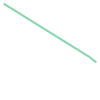

In [71]:
paths_data.loc[1407].geometry

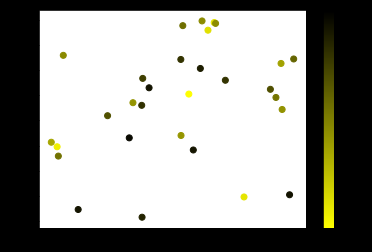

In [141]:
import numpy as np
import matplotlib.pyplot as plt


norm=plt.Normalize(-2,2)
plt.scatter(x,y,c=c, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

In [154]:
yell = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","black"])

TypeError: 'LinearSegmentedColormap' object does not support indexing

In [215]:
cl = ps.Fisher_Jenks(gdf["euclidean"], 7)
cmap = cm.get_cmap('gist_heat') 
cmap(7)

(0.041176470588235294, 0.0, 0.0, 1.0)

In [41]:
from shapely.affinity import translate

7
(0.91666174462696193, 0.0, 0.0, 1.0)
(1.0, 0.35416704947854455, 0.0, 1.0)
(1.0, 0.79166633854219981, 0.0, 1.0)
(1.0, 1.0, 0.34374934374934368, 1.0)
(1.0, 1.0, 1.0, 1.0)


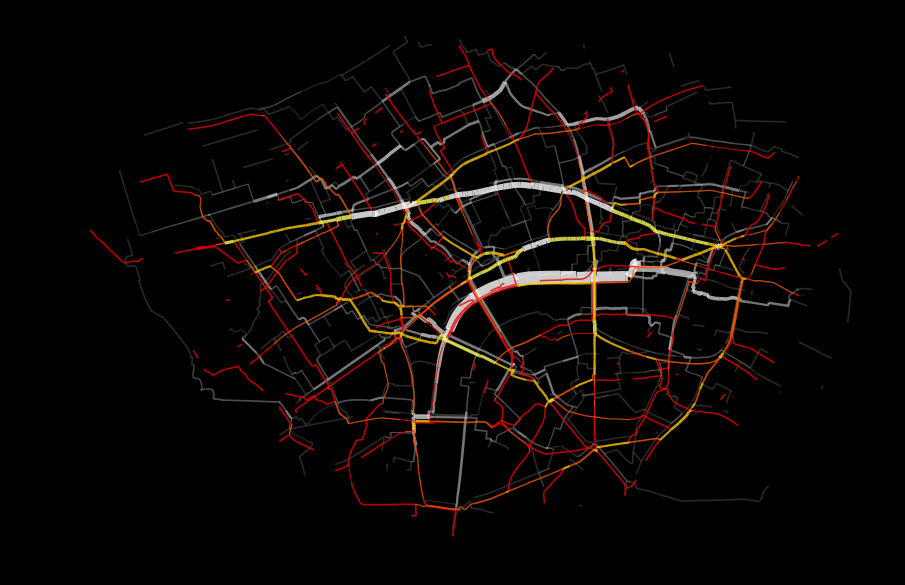

In [44]:
import matplotlib.colors
yell = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "yellow"])

def ss_grad_GDF(gdf, column, column2, title, black_back, cmap = 'Greys_r', save = False, directory = None):
    
#     gdf.sort_values(by = column, ascending = True, inplace = True)
    f, ax = plt.subplots(1, figsize=(15, 15))
    if black_back == True: tcolor = 'white'
    else: tcolor = 'black'
    rect = f.patch    
    if black_back == True: rect.set_facecolor('black')
    else: rect.set_facecolor('white')

    cl = ps.Fisher_Jenks(gdf[column], 7)
    tmp = gdf.assign(cl = cl.yb)
    cmap = cm.get_cmap('Greys_r', len(cl.bins)) 
    tmp = gdf.assign(cl = cl.yb)
#     lw = gdf[column]*3/1000
    lw = 2.5
#     gdf.assign(cl=cl.yb).plot(ax=ax, column='cl', categorical=True, k=8, cmap=cmap, linewidth=lw, legend=False)
    
    for i in range(0, len(cl.bins)):
        tmp_p = tmp[tmp.cl == i]
        lw = tmp_p[column]*4/1000
        lw = [1.6 if x < 1 else x for x in lw]
        if i <2: continue
        if i == len(cl.bins): alpha = 1
        else: alpha = i/10+0.20
        
        tmp_p.plot(ax=ax, color = cmap(i), categorical=True, 
                   linewidth = lw, legend=False, alpha = alpha)

    geo = gdf['geometry'].apply(lambda x: translate(x, xoff=0, yoff=-50))
    df = gdf.drop(['geometry'], axis=1).copy()
    crs = gdf.crs
    gdf2 = gpd.GeoDataFrame(df, crs=crs, geometry = geo) 
    
#     gdf2.sort_values(by = column2, ascending = True, inplace = True)
    cl = ps.Fisher_Jenks(gdf2[column2], 7)
    cmap = cm.get_cmap('hot', len(cl.bins)) 
    tmp = gdf2.assign(cl = cl.yb)

#     linewidth = gdf2[column2]*3/1000
    uf.scaling_columnDF(gdf2, column2, inverse = False)
#     alpha = gdf2[column2+"_sc"]
#     gdf2.assign(cl=cl.yb).plot(ax=ax, column='cl', categorical=True, k=7, cmap=cmap, linewidth=lw, alpha = 0.8, legend=True)
    
    print(len(cl.bins))
    for i in range(0, len(cl.bins)):
        tmp_p = tmp[tmp.cl == i]
        lw = tmp_p[column2]*3/1000
        lw = [1.6 if x < 1 else x for x in lw]
        if i <2: continue
#         if i == 0: alpha = 0
#         elif i == len(cl.bins): alpha = 1
#         else: alpha = i/10+0.20
        color = cmap(i)
        print(color)
        tmp_p.plot(ax=ax, color = color, categorical = True, linewidth = lw, alpha = alpha, legend=False )    

    ax.set_axis_off() 
    plt.axis('scaled')
    plt.show()

ss_grad_GDF(paths_data, "euclideanLand","euclidean", "--", black_back = True, save = True)

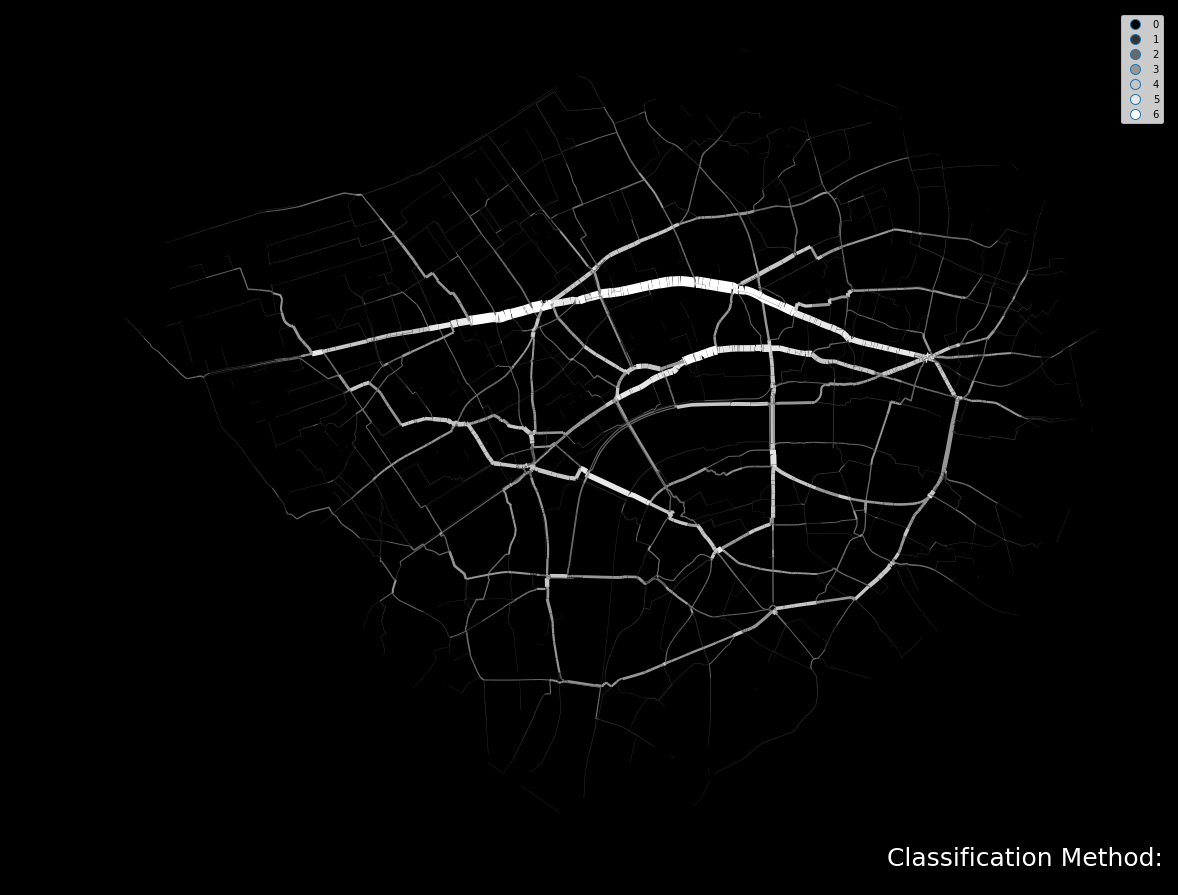

In [35]:
def ttF(gdf, column, title, black_back = True, cmap = 'Greys_r', save = False, directory = None):
    
#     cmap = cm.get_cmap('Greys_r', 7) 

    f, ax = plt.subplots(figsize=(20, 20)) 
    if black_back == True: tcolor = 'white'
    else: tcolor = 'black'
    rect = f.patch    
    if black_back == True: rect.set_facecolor('black')
    else: rect.set_facecolor('white')
    

    cl = ps.Fisher_Jenks(gdf[column], 7)
    tmp = gdf.assign(cl = cl.yb)
    cmap = cm.get_cmap('Greys_r', len(cl.bins)) 
    
#     bins = [50, 100, 200, 400, 800, 1600, 3200, 5000]
#     cl = ps.User_Defined(gdf[column], bins)
#     cmap = cm.get_cmap('Greys_r', len(cl.bins))
    tmp = gdf.assign(cl = cl.yb)
    
    lw = gdf[column]*5/1000
    gdf.assign(cl=cl.yb).plot(ax=ax, column='cl', categorical=True, k=8, cmap=cmap, 
                              linewidth=lw, legend=True)       
   
    smallprint = ax.text(
    .995, 0,
    'Classification Method:',
    ha='right', va='bottom',
    size=25,
    color='white',
    transform=ax.transAxes)
    
    

#     f.suptitle(title)

    ax.set_axis_off() 
    plt.axis('scaled')
    if black_back == True: plt.rcParams['figure.facecolor'] = 'black'
    else: plt.rcParams['figure.facecolor'] = 'white'     
        
    plt.rcParams['figure.facecolor'] = 'black'

    plt.show()


el = ttF(paths_data,"euclidean","euclideanLand", black_back = True, save = True)

In [ ]:
#     leg = ax.get_legend()

# #     leg.set_title(title)
#     leg.get_title().set_fontsize(30)
#     leg.get_title().set_color('white')
#     plt.setp(ax.get_legend().get_texts(), fontsize=20, color = 'white')
    
#     leg.set_frame_on(True)
#     frame = leg.get_frame()
#     frame.set_facecolor('black')
# #     frame.set_alpha(0.9)
#     leg.set_bbox_to_anchor((1.20, 0.65))
#     leg.get_frame().set_linewidth(0.0)
    
#     for l in leg.get_lines():
#         l._legmarker.set_marker('_')
#         l._legmarker.set_markersize(20)
#         l._legmarker.set_linestyle('-')
#         l._legmarker.set_markeredgewidth(6)
#         l._legmarker.set_markeredgecolor(l.get_markerfacecolor())
    
#     leg.handletextpad = 1.5
#     if save == True: f.savefig(directory+title+'.png', format='png',  dpi=500) 
#     return(plt)

In [ ]:
paths_data.head()

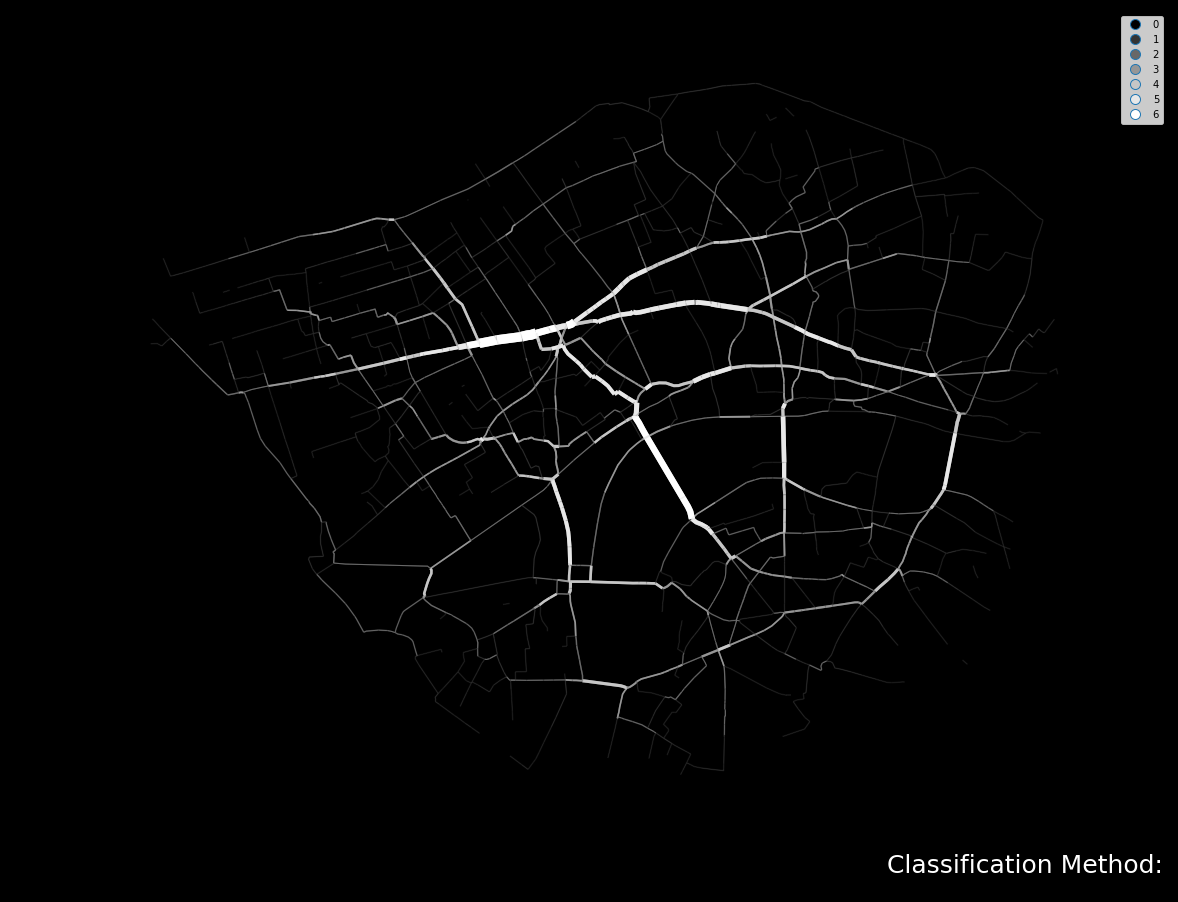

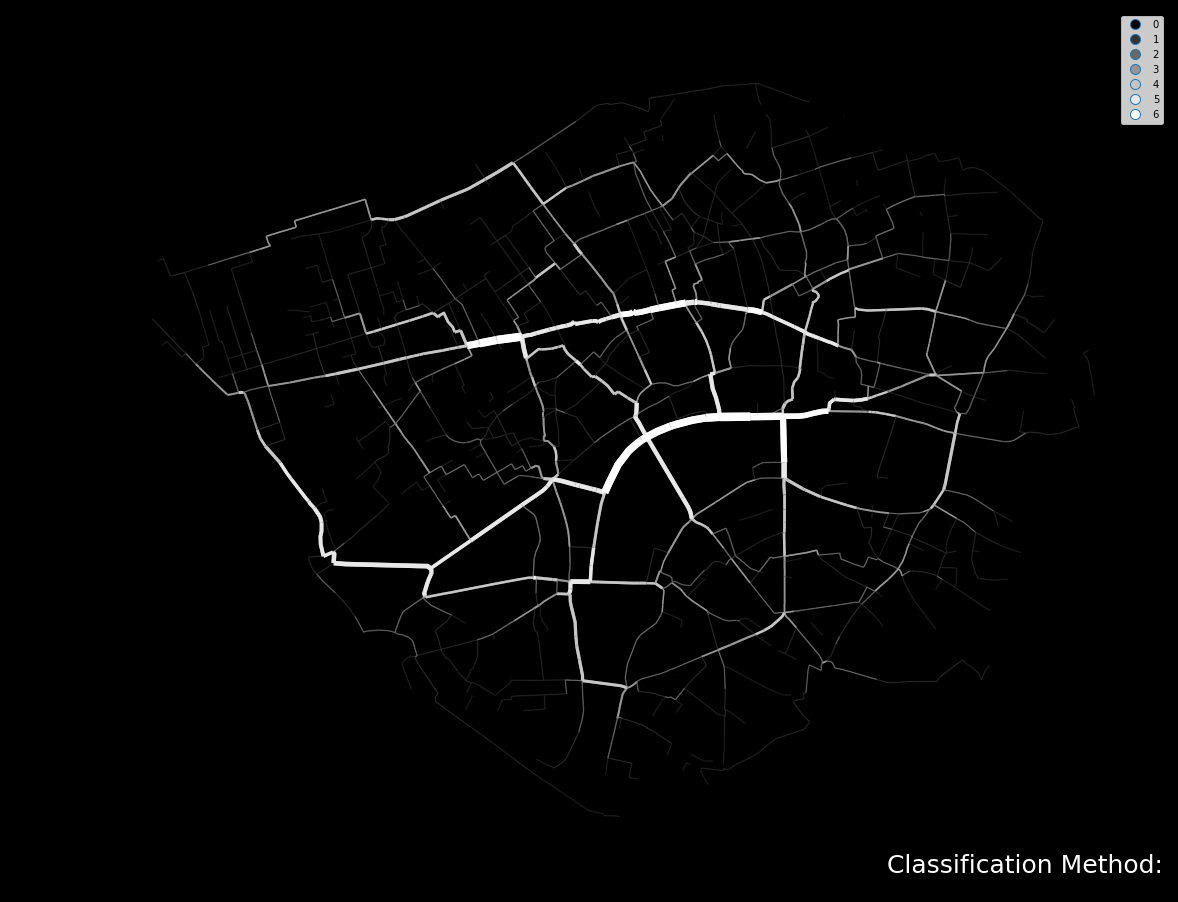

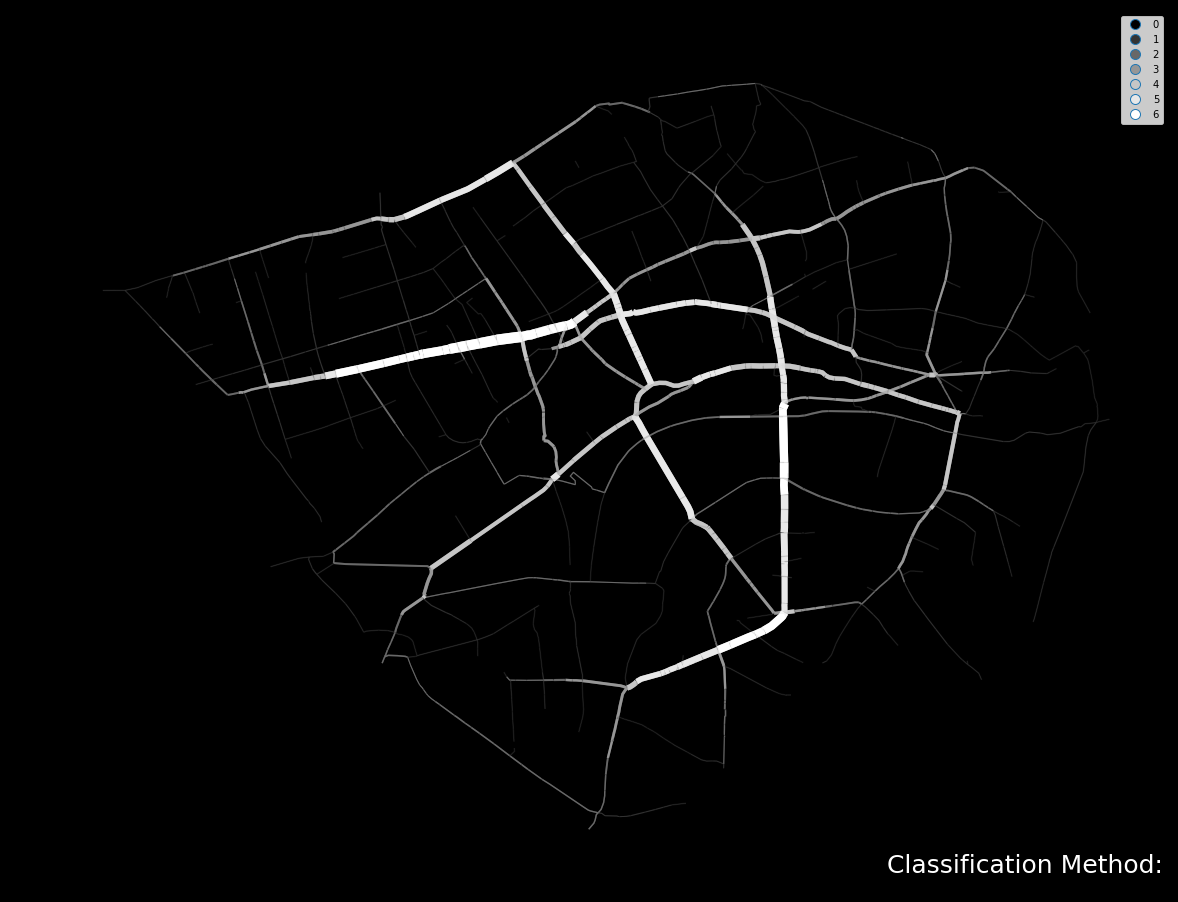

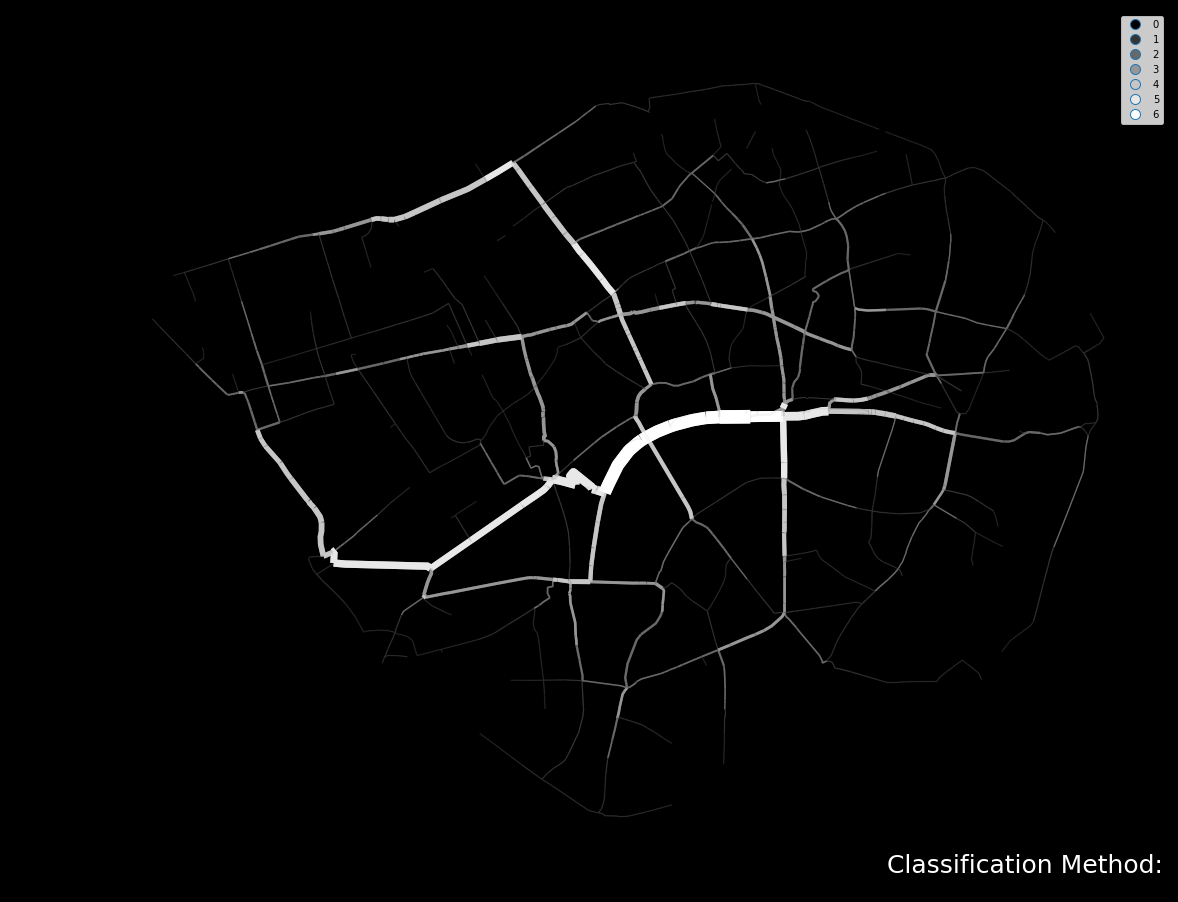

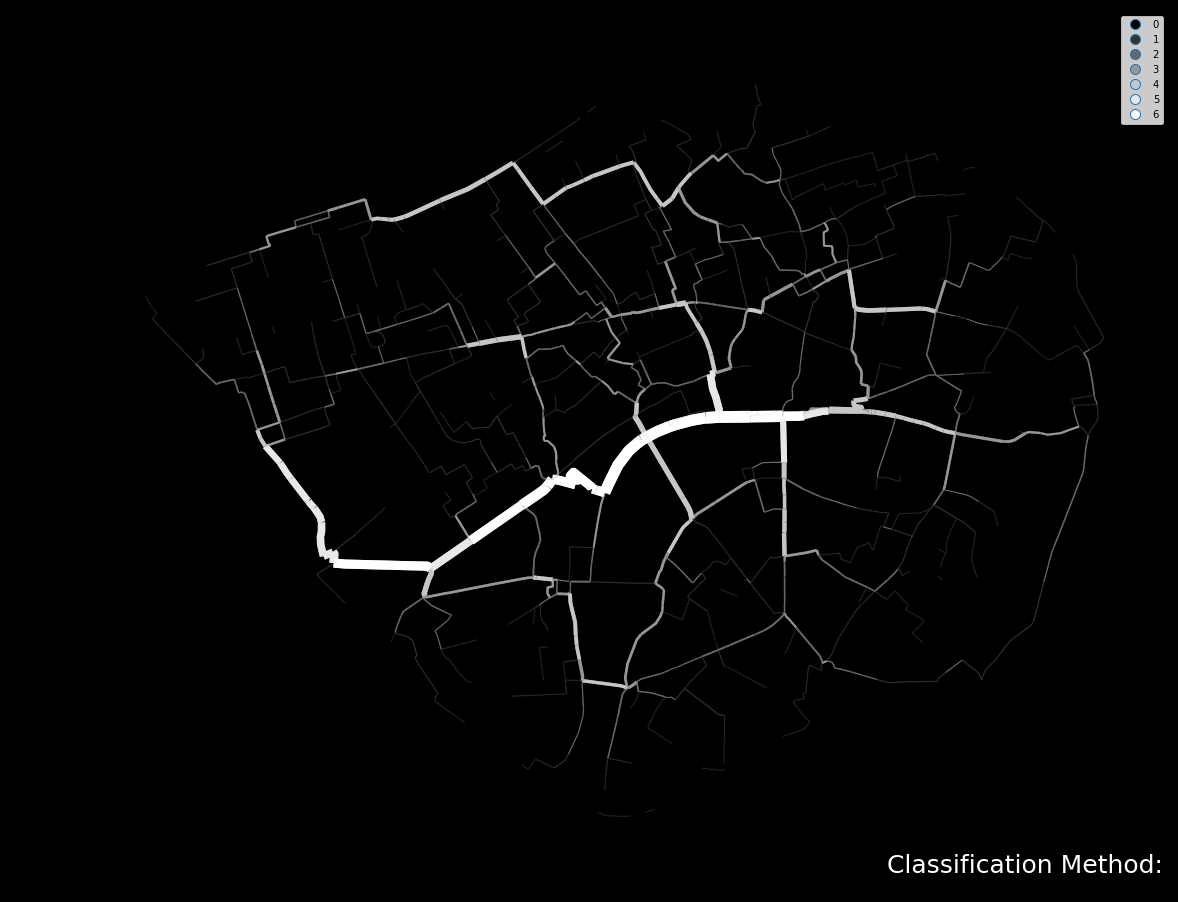

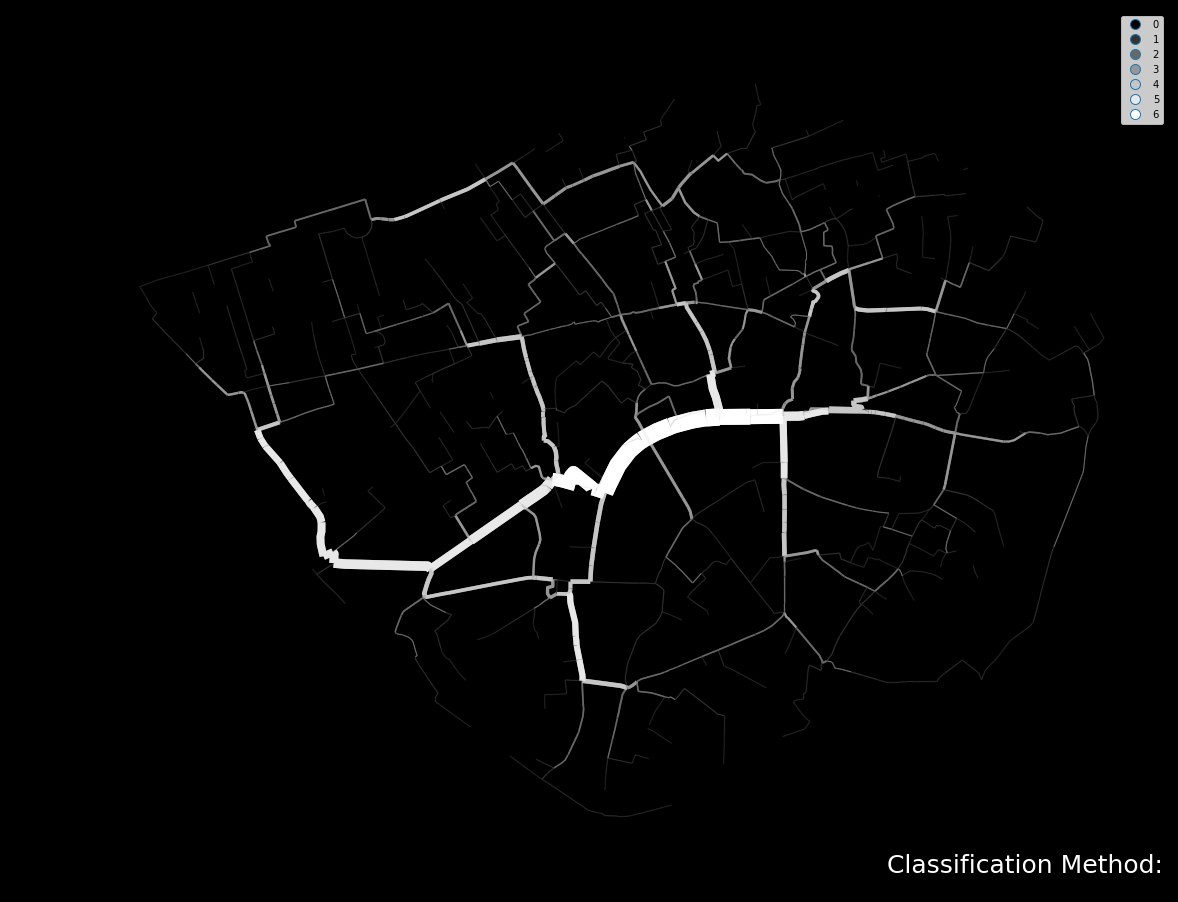

ValueError: Fewer unique values than specified classes.

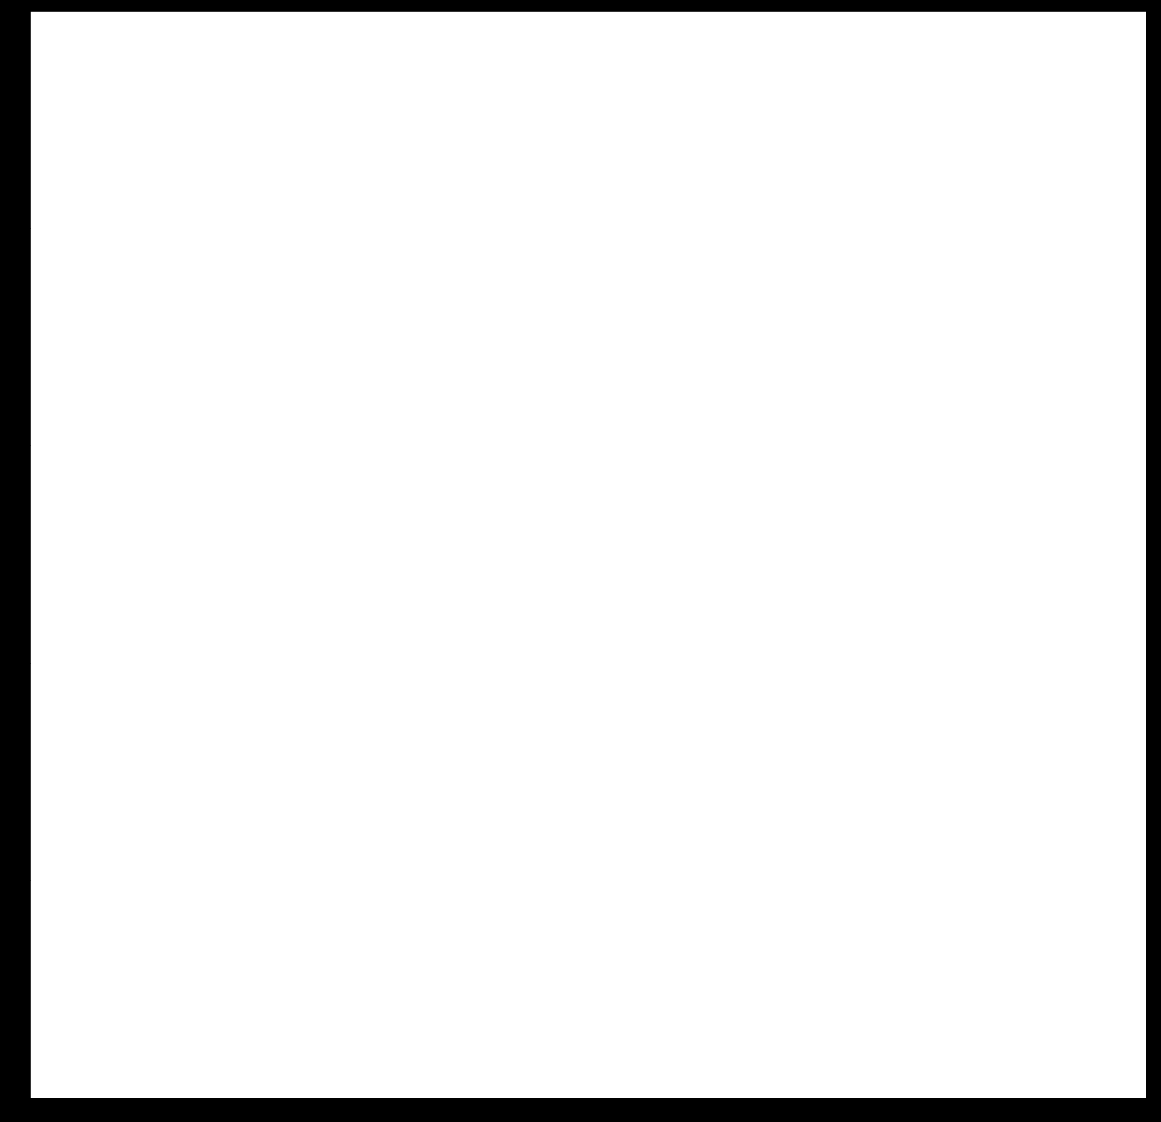

In [23]:
directory ='C:/Users/g_filo01/sciebo/Presentations/Agile/'

plot_grad_GDF(paths_data,"euclidean","euclidean", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"euclideanLand","euclideanLand", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"angular","angular", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"angularLand","angularLand", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"topological","topological", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"topologicalLand","topologicalLand", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"landmark","topologicalLand", black_back = True, save = True, directory = directory)

In [ ]:
x = 5710464.32
y = 699978.99

In [ ]:
import folium

gjson = paths_data.to_crs(epsg='4326').to_json()

In [ ]:
m = folium.Map(location=[51.30, 0.7], zoom_start=7, tiles="cartodbpositron")

m.choropleth(
    geo_data=paths_data,
    data=paths_data,
    columns=['euclidean'],
    key_on='feature.properties.pfaf_7',
    legend_name='Area (sq mi)', 
    fill_color='YlGn',
    fill_opacity=0.4,
    highlight=True)

m

In [ ]:
ic.plot_grad_GDF(paths_data,"angular","euclidean", black_back = True)

In [ ]:
ic.plot_grad_GDF(paths_data,"angularLand","euclideanLand", black_back = True)

In [ ]:
ic.plot_grad_GDF(paths_data,"euclideanDiff","diff", cmap = 'bwr', black_back = False)

In [ ]:
nodes[(nodes.x > 530369)  & (nodes.x < 530370) ]